# 图像上的算术运算

### 目标

- 学习图像的几种算术运算，例如加法，减法，按位运算等。
- 您将学习以下功能：**cv.add**，**cv.addWeighted**等。

### 图像加法

您可以通过OpenCV函数`cv.add()`或仅通过numpy操作`res = img1 + img2`添加两个图像。两个图像应具有相同的深度和类型，或者第二个图像可以只是一个标量值。

> **注意**
  OpenCV加法和Numpy加法之间有区别。OpenCV加法是饱和运算，而Numpy加法是模运算。

例如，考虑以下示例：

In [1]:
import numpy as np
import cv2 as cv

x = np.uint8([250])
y = np.uint8([10])
print( cv.add(x,y) ) # 250+10 = 260 => 255

[[255]]


In [2]:
print( x+y )

[4]


当添加两个图像时，它将更加可见。OpenCV功能将提供更好的结果。因此，始终最好坚持使用OpenCV功能。

### 图像融合

这也是图像加法，但是对图像赋予不同的权重，以使其具有融合或透明的感觉。根据以下等式添加图像：


$$G(x)= (1 - \alpha)f_0(x)+ \alpha f_1(x)$$

通过从 $\alpha$ 从 $0\rightarrow1$ 更改，您可以在一个图像到另一个图像之间执行很酷的过渡。

在这里，我拍摄了两个图像，将它们融合在一起。第一幅图像的权重为0.7，第二幅图像的权重为0.3。`cv.addWeighted()`在图像上应用以下公式。

$$dst=\alpha \cdot img1+\beta \cdot img2 + \gamma$$

在这里，$\gamma$ 被视为零。

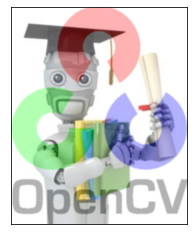

In [3]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt

img1 = cv.imread('data/ml.png')
img2 = cv.imread('data/opencv-logo.png')

h, w = img1.shape[:2]
img2 = cv.resize(img2, dsize=(w, h))

dst = cv.addWeighted(img1, 0.7, img2, 0.3, 0)

plt.imshow(cv.cvtColor(dst, cv.COLOR_BGR2RGB), interpolation = 'bicubic')
plt.xticks([]), plt.yticks([])  # 隐藏 x 轴和 y 轴上的刻度值
plt.show()

### 按位运算

这包括按位 `AND`、 `OR`、`NOT` 和 `XOR` 操作。它们在提取图像的任何部分(我们将在后面的章节中看到)、定义和处理非矩形 ROI 等方面非常有用。 下面我们将看到一个例子，如何改变一个图像的特定区域。
我想把 OpenCV 的标志放在一个图像上面。如果我添加两个图像，它会改变颜色。如果我混合它，我得到一个透明的效果。但我希望它是不透明的。如果是一个矩形区域，我可以使用 ROI，就像我们在上一章中所做的那样。但是 OpenCV 的 logo 不是长方形的。所以你可以使用如下的按位操作来实现: 

我想在图像上方放置OpenCV徽标。如果添加两个图像，它将改变颜色。如果混合它，我将获得透明效果。但我希望它不透明。如果是矩形区域，则可以像上一章一样使用ROI。但是OpenCV徽标不是矩形。因此，您可以按如下所示进行按位操作：

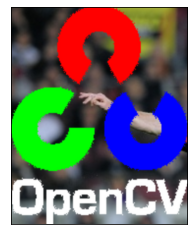

In [4]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt

# 加载两张图片
img1 = cv.imread('data/messi5.jpg')
img2 = cv.imread('data/opencv-logo-white.png')

# 我想把logo放在左上角，所以我创建了ROI
rows,cols,channels = img2.shape
roi = img1[0:rows, 0:cols ]

# 现在创建logo的掩码，并同时创建其相反掩码
img2gray = cv.cvtColor(img2,cv.COLOR_BGR2GRAY)
ret, mask = cv.threshold(img2gray, 10, 255, cv.THRESH_BINARY)
mask_inv = cv.bitwise_not(mask)

# 现在将ROI中logo的区域涂黑
img1_bg = cv.bitwise_and(roi,roi,mask = mask_inv)

# 仅从logo图像中提取logo区域
img2_fg = cv.bitwise_and(img2,img2,mask = mask)

# 将logo放入ROI并修改主图像
dst = cv.add(img1_bg,img2_fg)
img1[0:rows, 0:cols ] = dst

plt.imshow(cv.cvtColor(dst, cv.COLOR_BGR2RGB), interpolation = 'bicubic')
plt.xticks([]), plt.yticks([])  # 隐藏 x 轴和 y 轴上的刻度值
plt.show()

### 其他资源

### 练习题

1. 使用`cv.addWeighted`函数在文件夹中创建图像的幻灯片放映，并在图像之间进行平滑过渡